# **Food Demand Forecasting**

## **Background information:**
There is a meal delivery company that operates in multiple cities. It has various fulfillment centers in these cities for dispatching food orders to their customers. The client needs help with demand forecasting for upcoming weeks for these centers to plan for the raw materials stocking accordingly. The replenishment of the majority of raw materials is done on a weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following dataset, the task is to predict the demand for the next 10 weeks for the center-food combinations in the test set.

## **Dataset source:**
https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting

## **Criteria for success:**
Delivering a model with > 90% accuracy to forecast the food demand for next 10 weeks by different meal options across various centers

## **Exploratory Data Analysis**

1.   Visualization of numerical and categorical features through histogram and bar plot respectively
2.   Outliers check using box plot for numerical features
3.   Correlation matrix to check relatioship between numerical features
4.   Scatter plots to check relationships between num_orders and other numerical features (based on correlation matrix)
5.   Plots to check relationship between num_orders and other categorical features



### **1. Loading the revised dataset (created during data wrangling section by merging multiple datasets)**

In [1]:
# Import relevant python libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the training datset (created during data wrangling section) into pandas dataframe
train_df = pd.read_csv('drive/MyDrive/DSC Capstone 2/train_revised.csv')

# Displaying the loaded dataset
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


### **2. Data Visualization**

*   Histogram for numerical features
*   Bar plots for categorical features



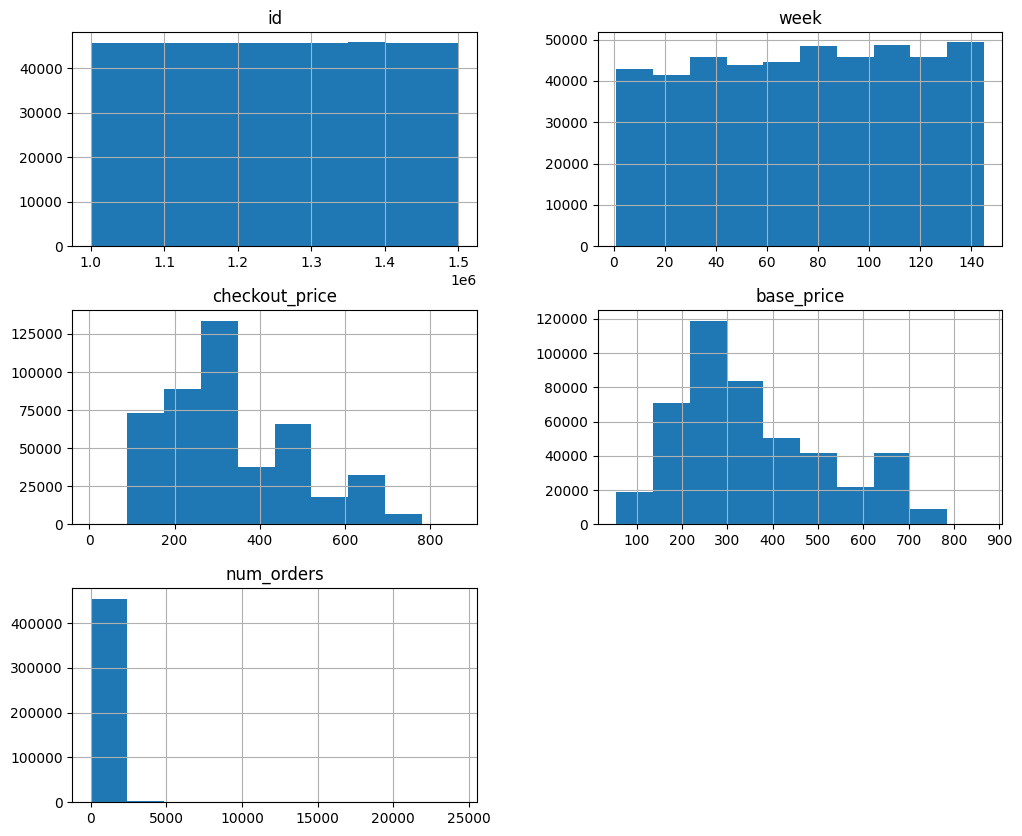

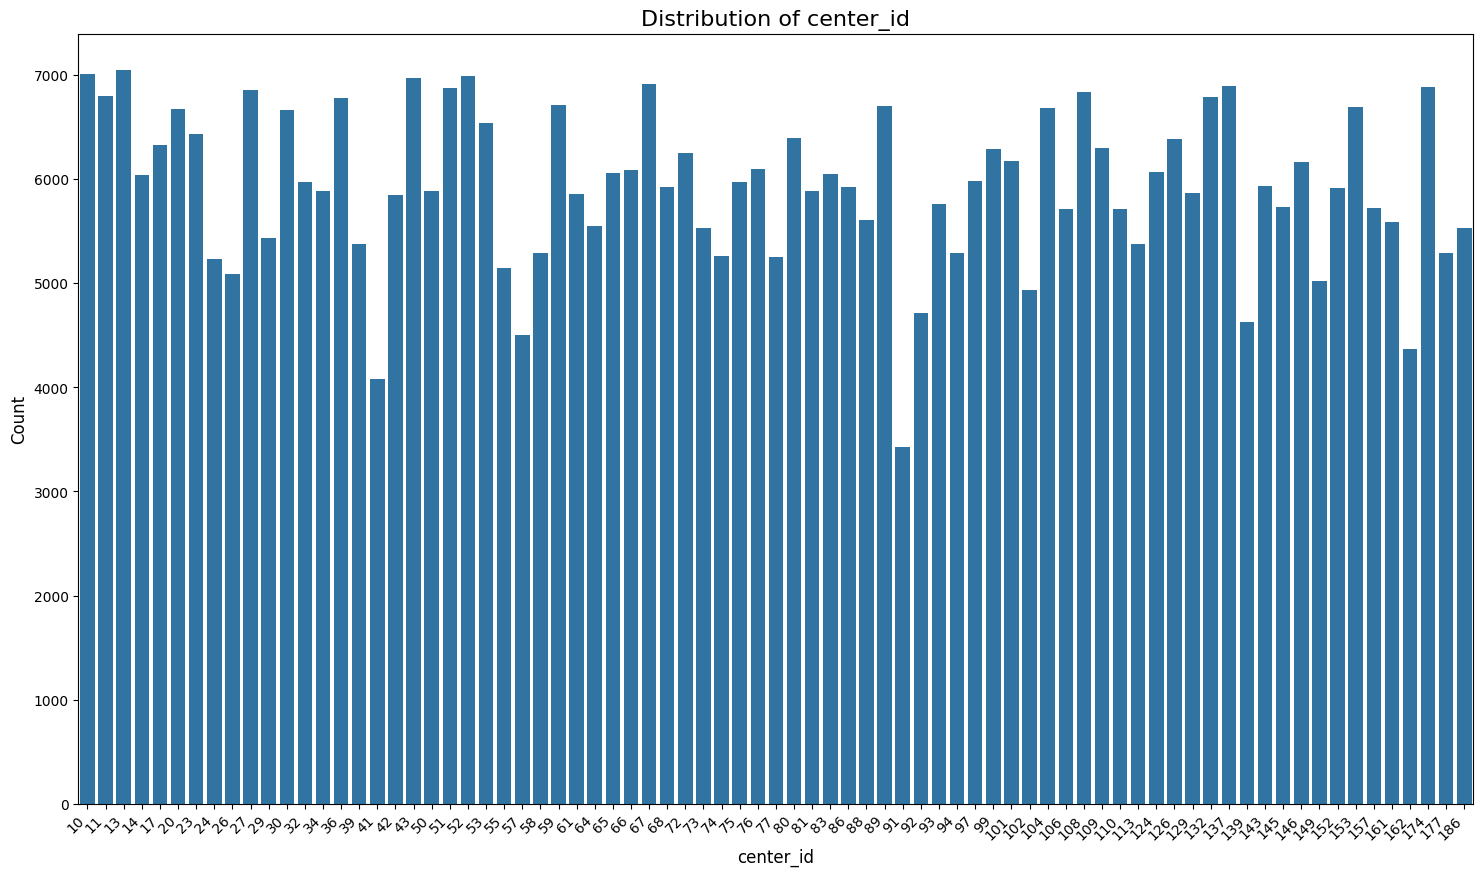

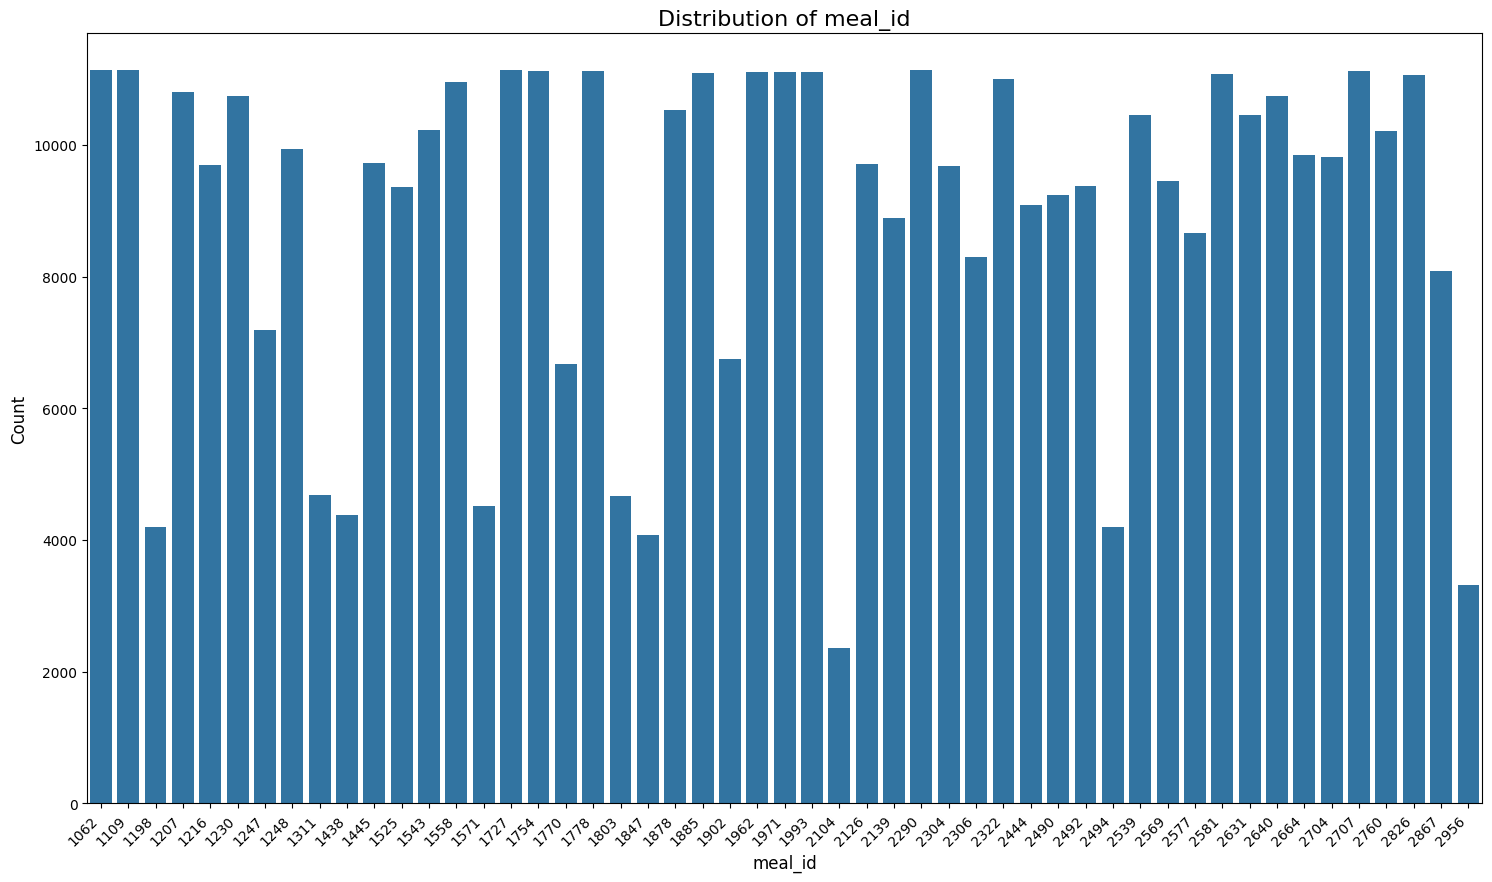

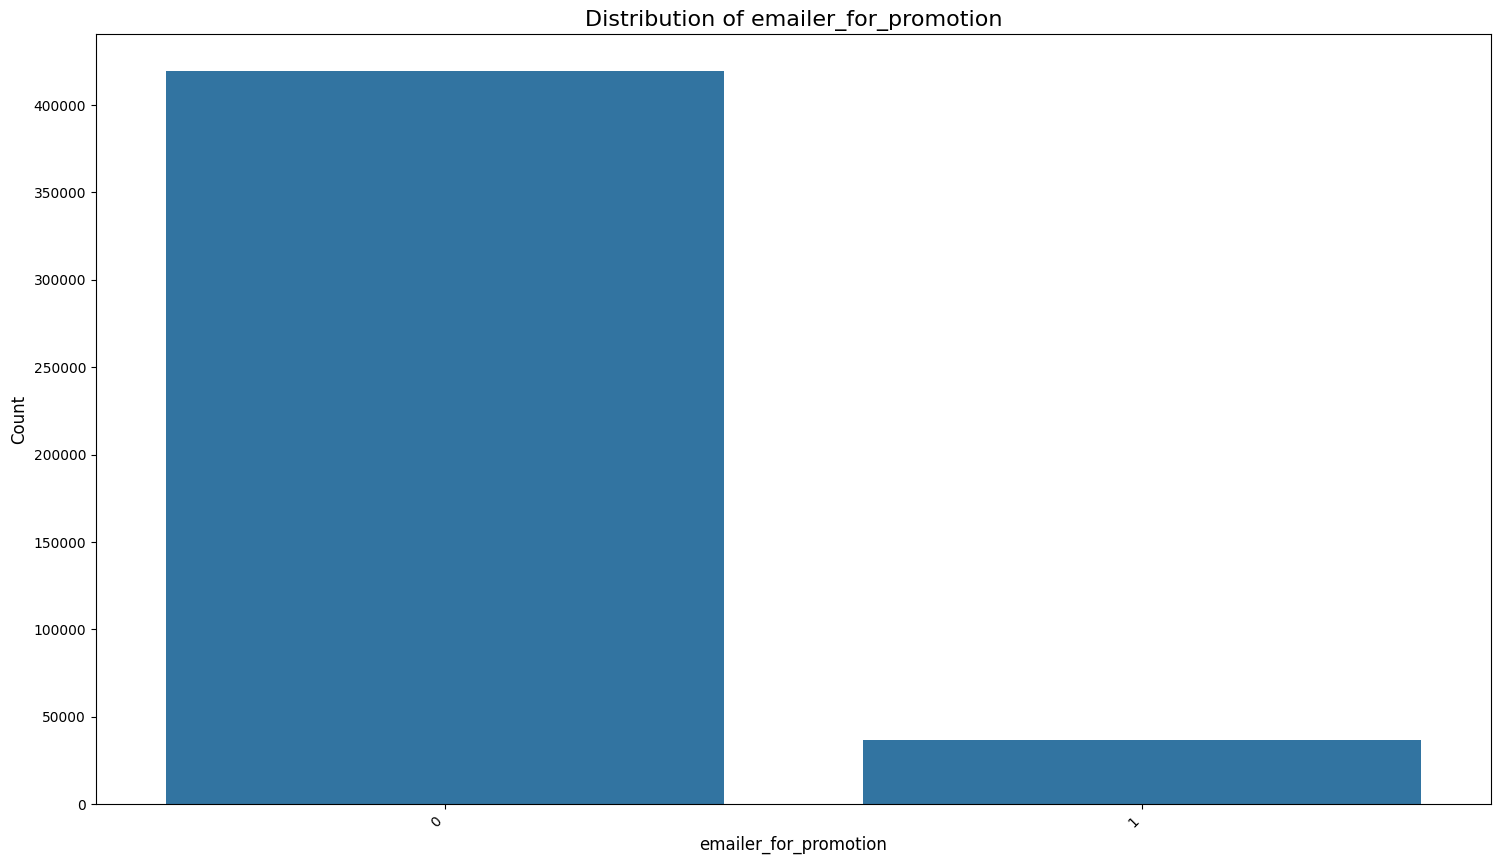

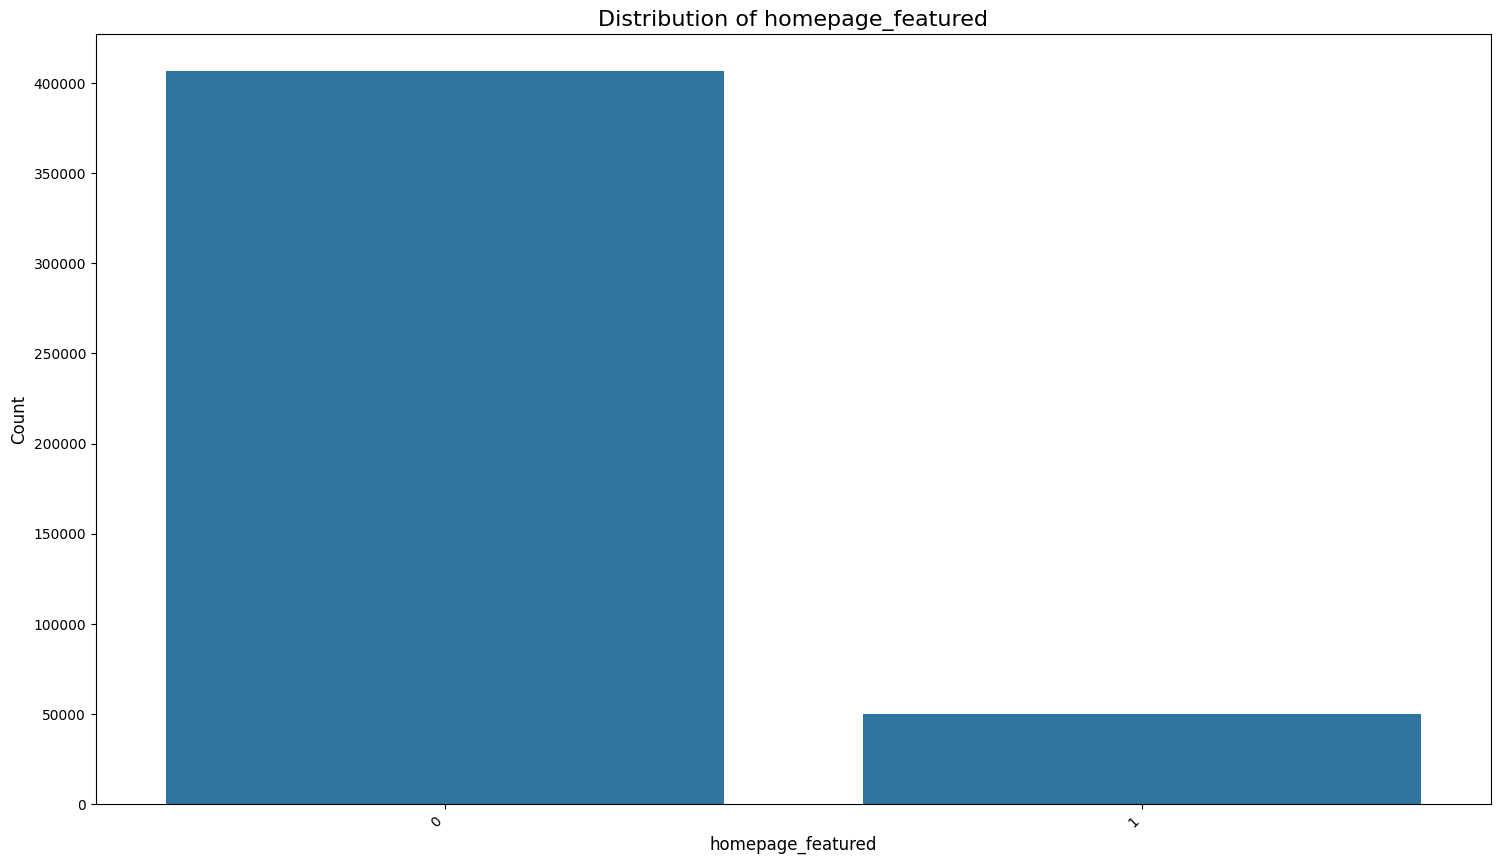

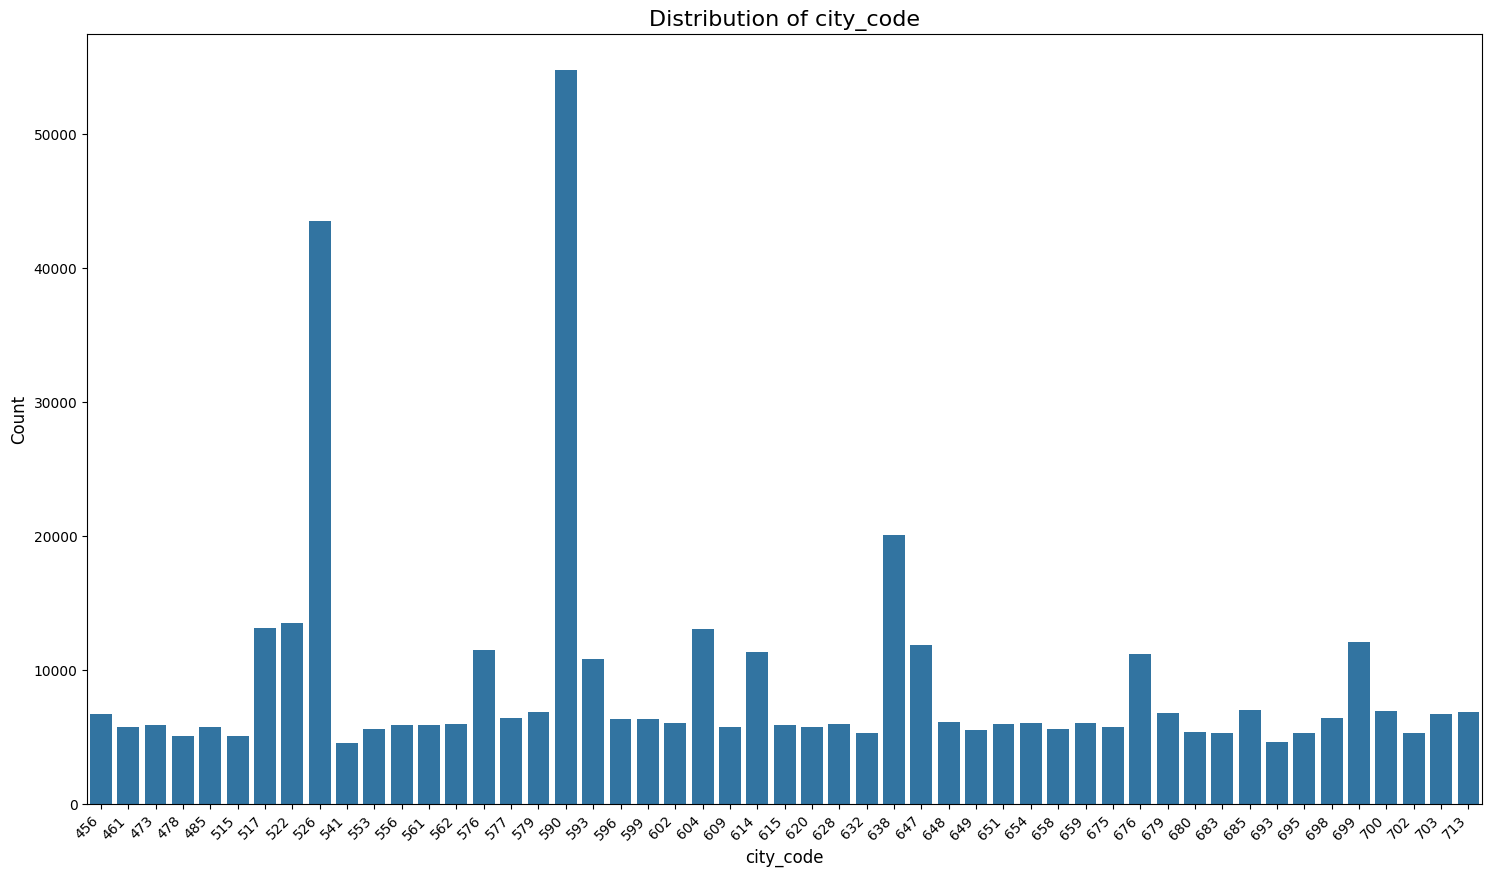

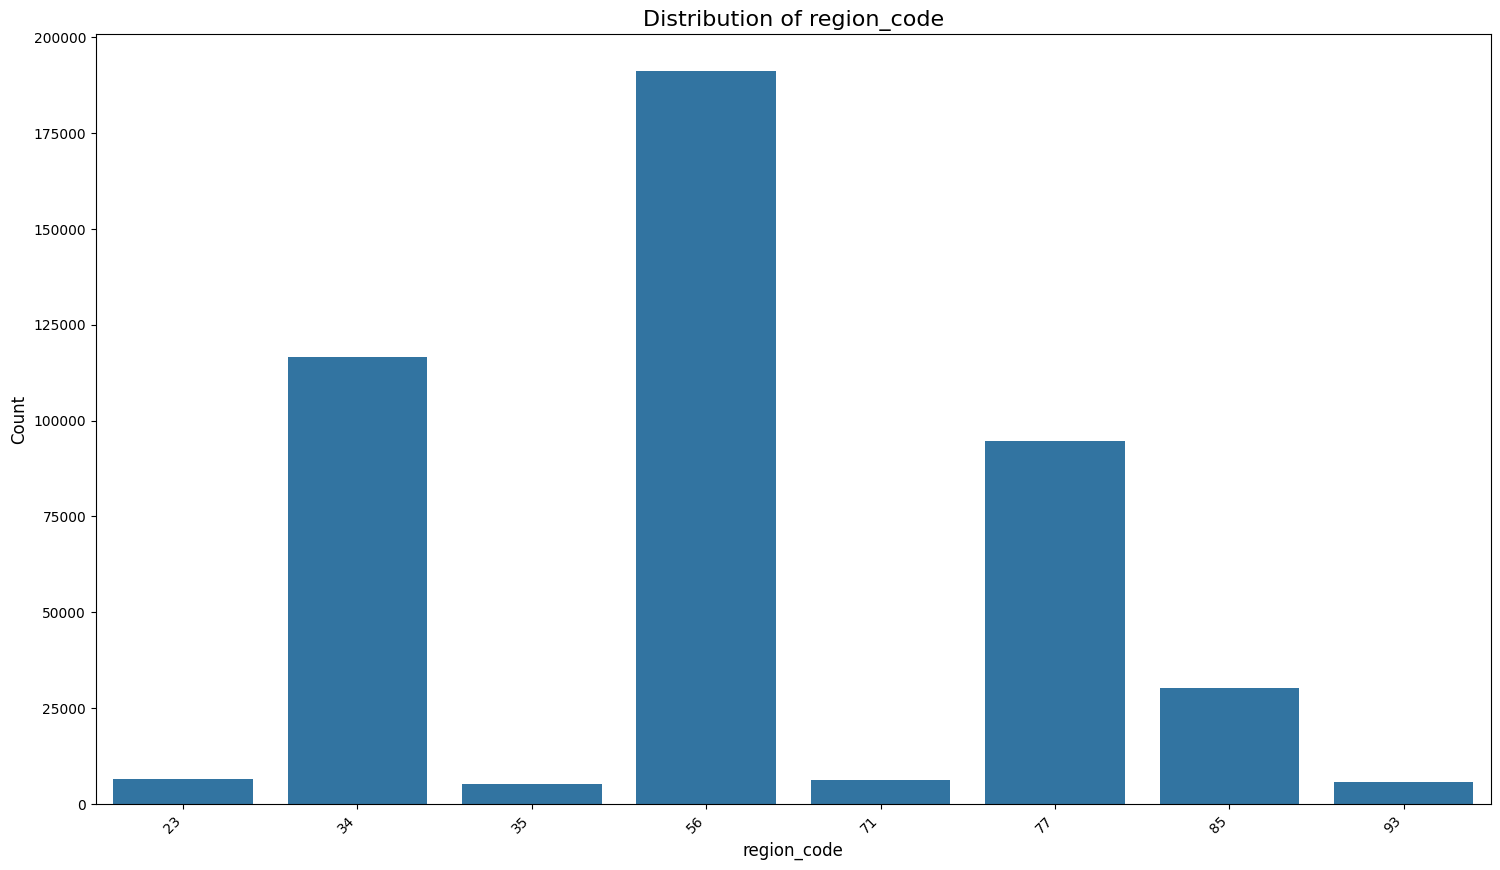

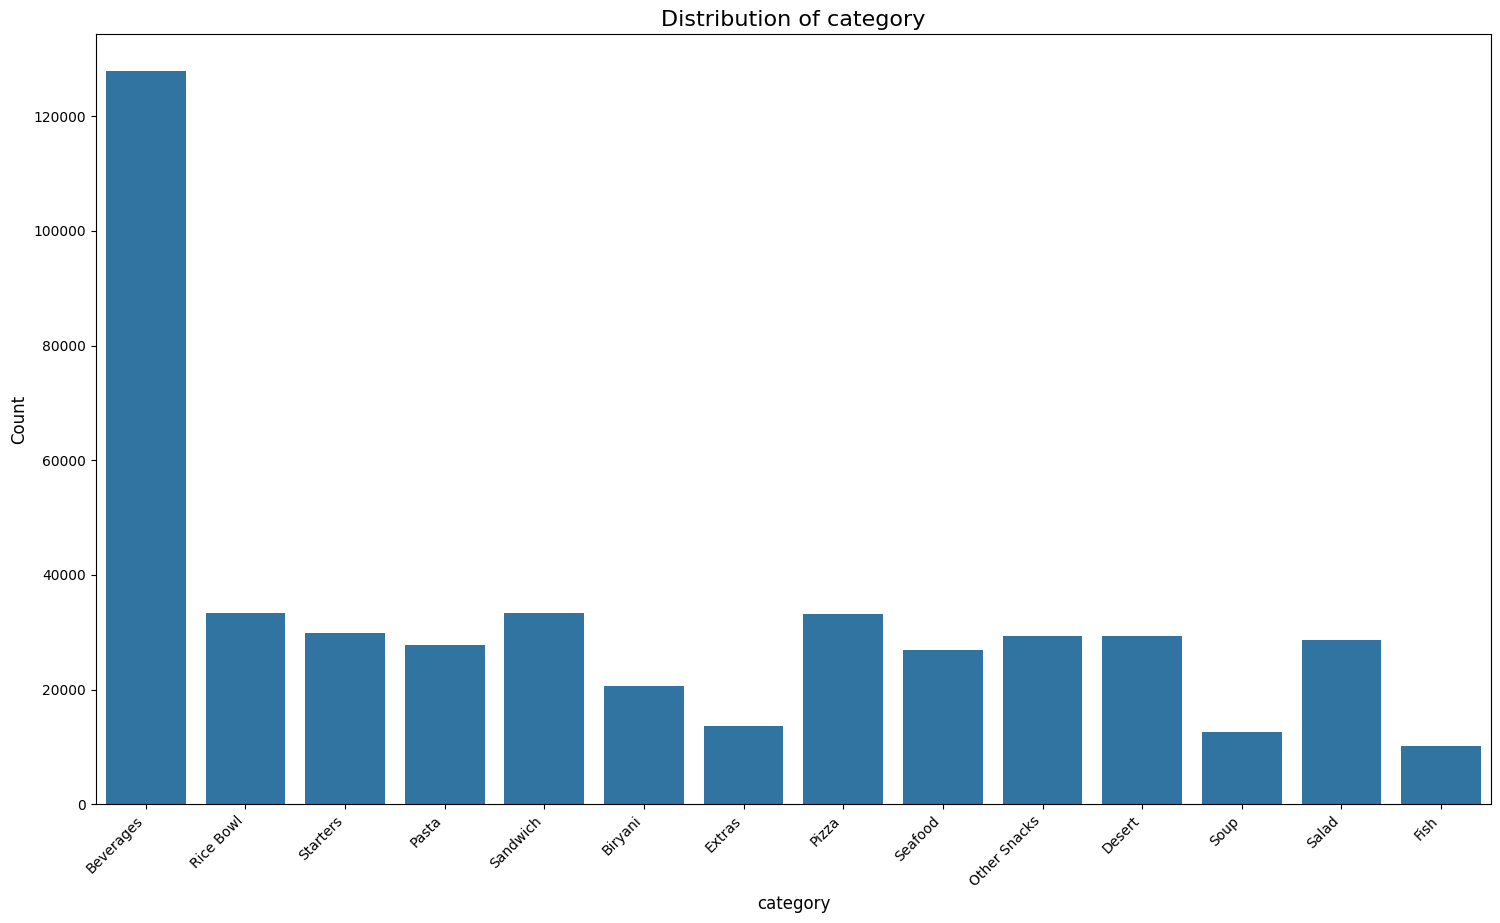

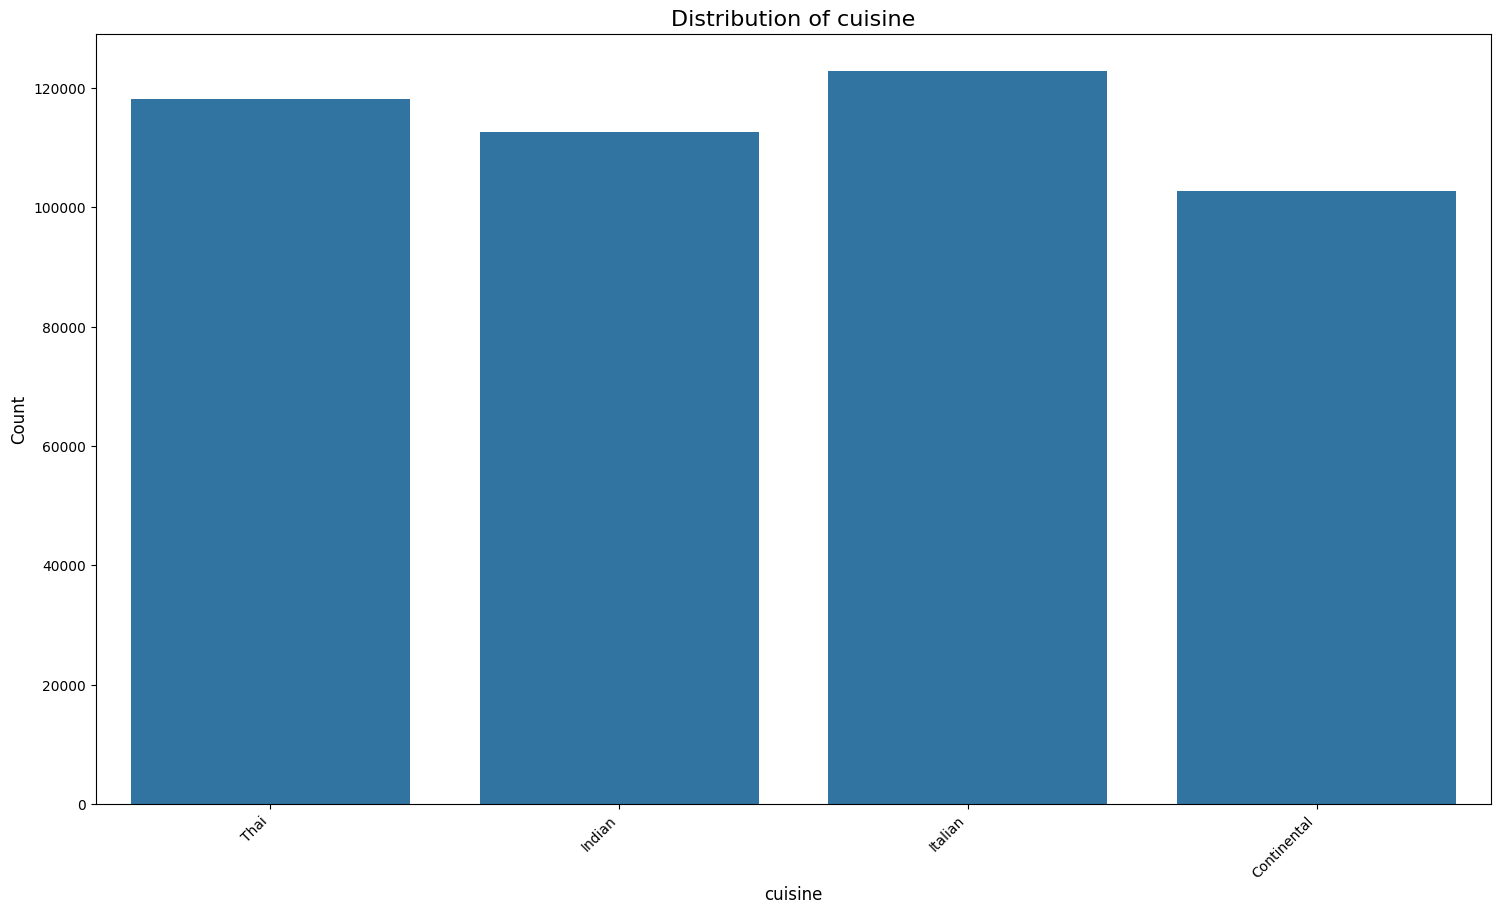

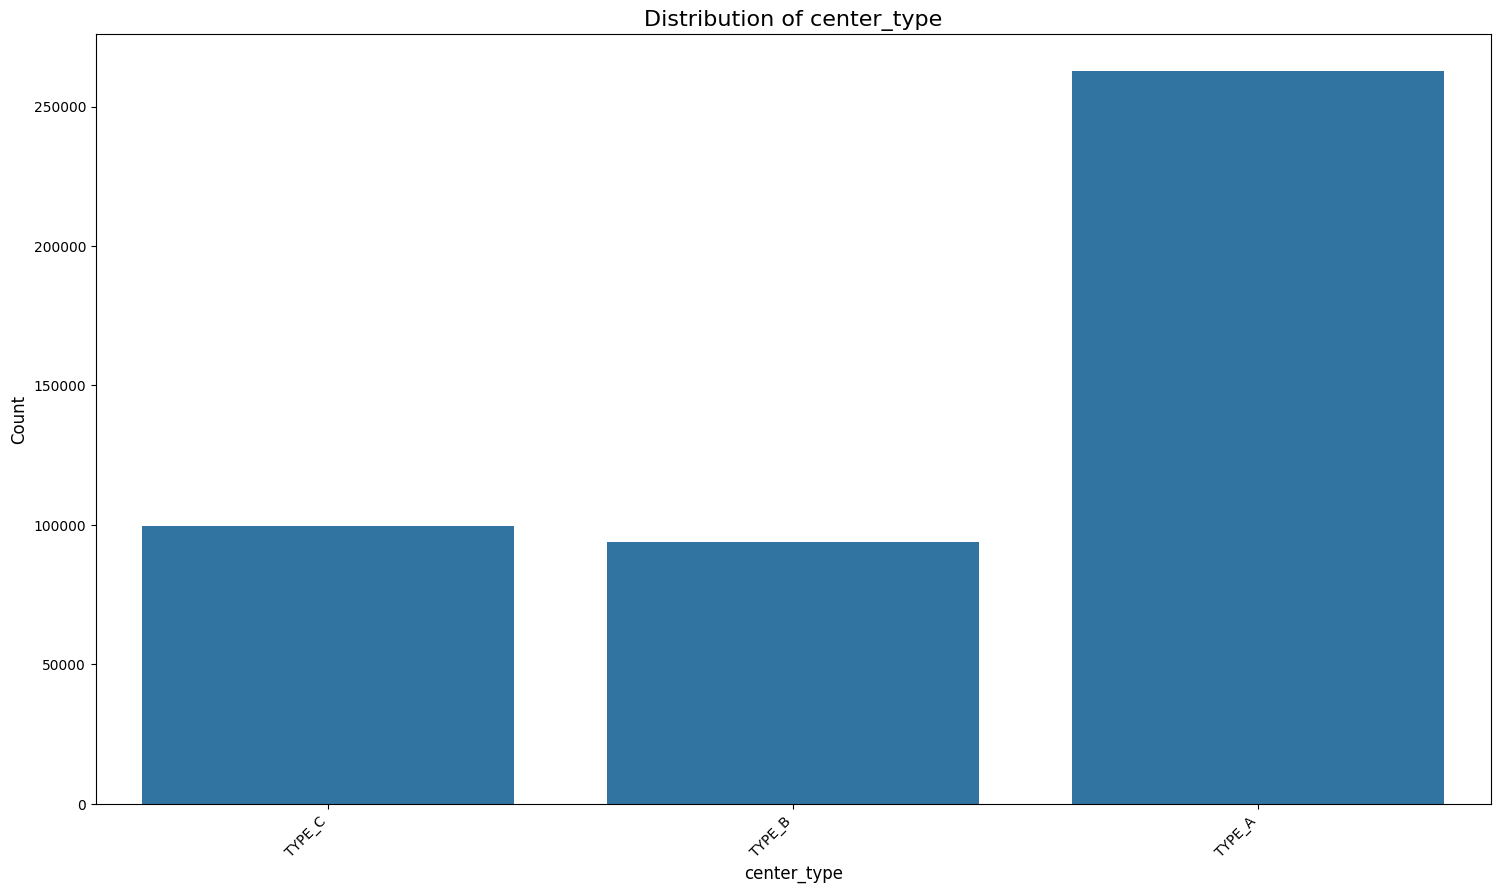

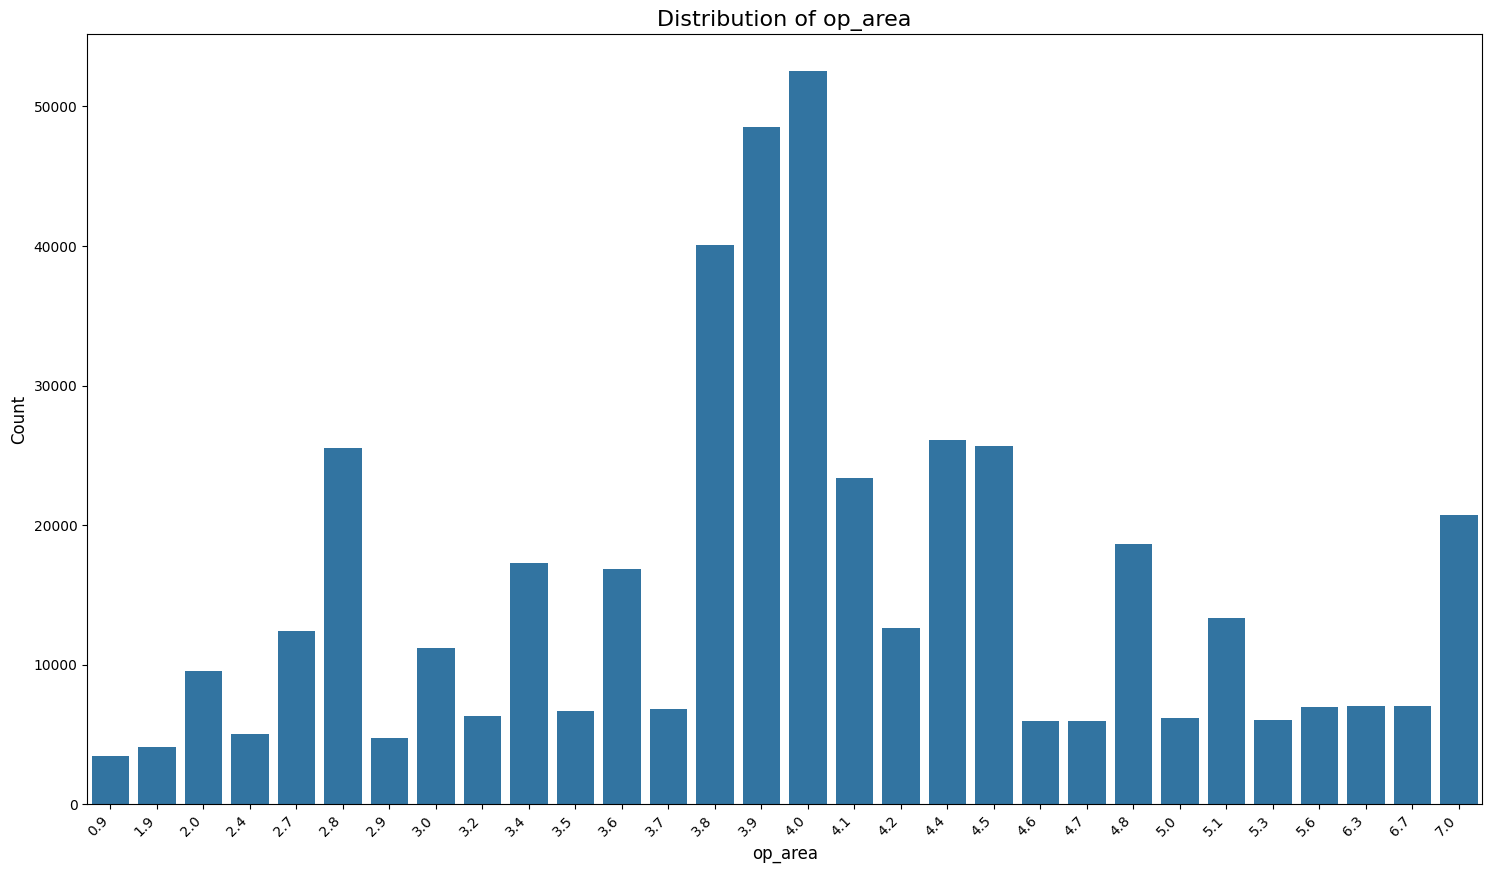

In [8]:
# Plot histograms for numeric features
numeric_features = ['id', 'week', 'checkout_price', 'base_price', 'num_orders']
train_df[numeric_features].hist(figsize=(12, 10))
plt.show()

# Plot bar plots for categorical features

categorical_features = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'op_area']

for feature in categorical_features:
    plt.figure(figsize=(18, 10))
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()



### **3. Correlation matrix for numerical features**

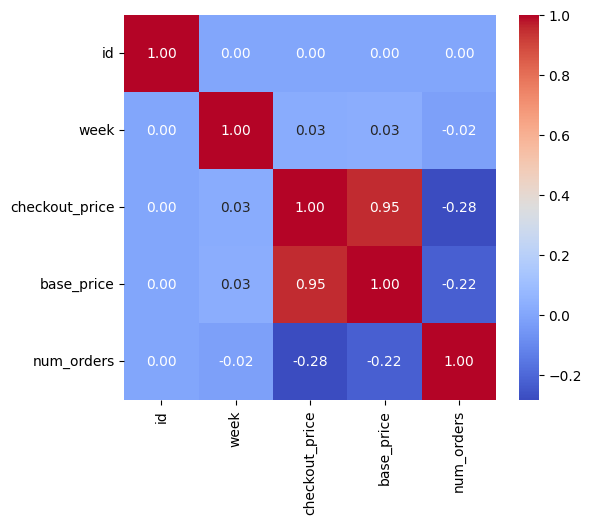

Pearson correlation coefficients:
                      id      week  checkout_price  base_price  num_orders
id              1.000000  0.002225        0.001941    0.002909    0.000702
week            0.002225  1.000000        0.026581    0.028614   -0.017210
checkout_price  0.001941  0.026581        1.000000    0.953389   -0.282108
base_price      0.002909  0.028614        0.953389    1.000000   -0.222306
num_orders      0.000702 -0.017210       -0.282108   -0.222306    1.000000


In [16]:
# Subset the training dataframe with numerical features only for correlation study
train_num_df = train_df[numeric_features]

# Calculate Pearson correlation matrix
correlation_matrix = train_num_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# You can also print the correlation coefficients
print("Pearson correlation coefficients:")
print(correlation_matrix)


# Show the plots
plt.show()


`base_price` and `checkout_price` are strongly positively correlated. In addition, weak negative correlation is seen between `num_orders` & `base_price`, and `num_orders` and `checkout_price`.

### **4. Check outliers in numerical features using box plot**

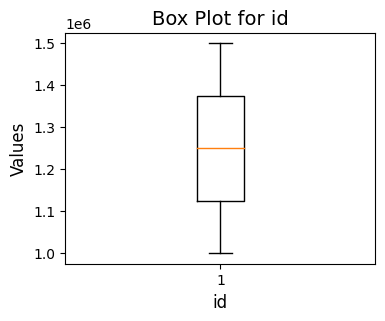

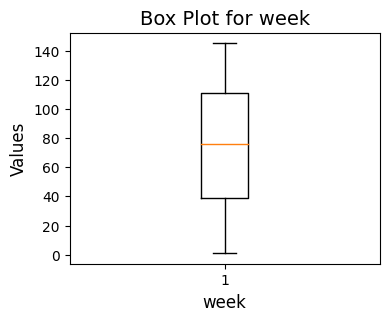

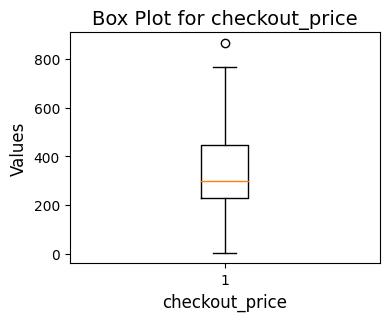

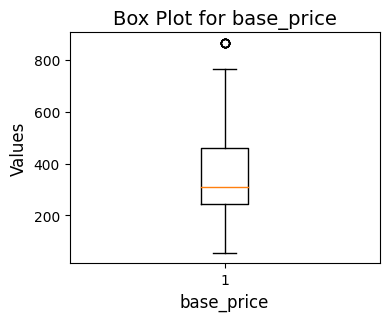

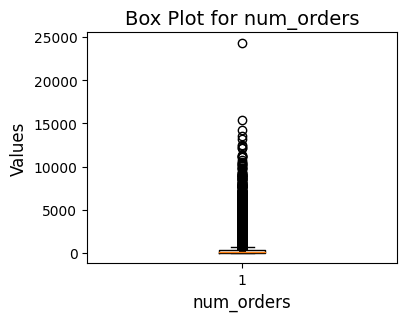

In [15]:
for column in numeric_features:
    plt.figure(figsize=(4, 3))
    plt.boxplot(train_df[column])
    plt.title(f'Box Plot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

Clearly `num_orders` has many outlier data points! This warrants further investigation to understand the drivers for this behavior!

### **5. Deep-dive to understand the nature and source of outlier data points in `num_orders` column**

In [28]:
# Five number summary for num_orders column
num_orders_summary = np.percentile(train_df['num_orders'], [0, 25, 50, 75, 100]).astype(int)

print('num_orders lowest value:', num_orders_summary[0])
print('num_orders Q1 value:', num_orders_summary[1])
print('num_orders median value:', num_orders_summary[2])
print('num_orders Q3 value:', num_orders_summary[3])
print('num_orders maximum value:', num_orders_summary[4])

num_orders lowest value: 13
num_orders Q1 value: 54
num_orders median value: 136
num_orders Q3 value: 324
num_orders maximum value: 24299


The median value for the order # is 136, while the maximum order # is 24299! Need to understand why some order #s are much higher than the rest of the data?

In [41]:
# Subset the training dataset with outliers in the num_orders column
train_df_subset = train_df[train_df['num_orders'] > (num_orders_summary[3] + 1.5 * (num_orders_summary[3] - num_orders_summary[1]))] # Definition of outliers
print(f'Percentage of data rows with outliers in num_orders column: {round(train_df_subset.shape[0] / train_df.shape[0] * 100, 2)}%')
train_df_subset.head()


Percentage of data rows with outliers in num_orders column: 7.21%


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
10,1469367,1,55,1230,323.01,390.00,0,1,823,647,56,TYPE_C,2.0,Beverages,Continental
11,1029333,1,55,2322,322.07,388.00,0,1,972,647,56,TYPE_C,2.0,Beverages,Continental
14,1378227,1,55,1109,264.84,297.79,1,0,756,647,56,TYPE_C,2.0,Rice Bowl,Indian
20,1044821,1,55,1971,259.99,320.13,1,1,798,647,56,TYPE_C,2.0,Sandwich,Italian
33,1040403,1,24,1885,136.83,136.83,0,0,1498,614,85,TYPE_B,3.6,Beverages,Thai


It appears that 7% of the total dataset consists of rows with outliers in `num_orders` column. We can take a closer look at this `train_df_subset` dataframe to understand if there are any drivers for higher number of orders!

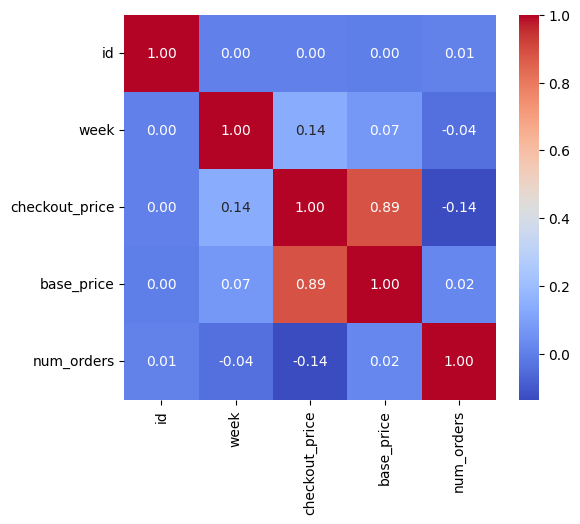

Pearson correlation coefficients:
                      id      week  checkout_price  base_price  num_orders
id              1.000000  0.003250        0.001354    0.000498    0.007718
week            0.003250  1.000000        0.135253    0.068804   -0.039608
checkout_price  0.001354  0.135253        1.000000    0.888505   -0.136617
base_price      0.000498  0.068804        0.888505    1.000000    0.020151
num_orders      0.007718 -0.039608       -0.136617    0.020151    1.000000


In [46]:
# Correlation matrix to check relationship between num_orders outliers and other numerical columns
train_df_subset_num = train_df_subset[numeric_features]

# Calculate Pearson correlation matrix
correlation_matrix = train_df_subset_num.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# You can also print the correlation coefficients
print("Pearson correlation coefficients:")
print(correlation_matrix)


# Show the plots
plt.show()

As perviously seen for the case of whole data set, here `base_price` and `checkout_price` are strongly positively correlated as well. In addition, weak negative correlation is seen between`num_orders` and `checkout_price`.

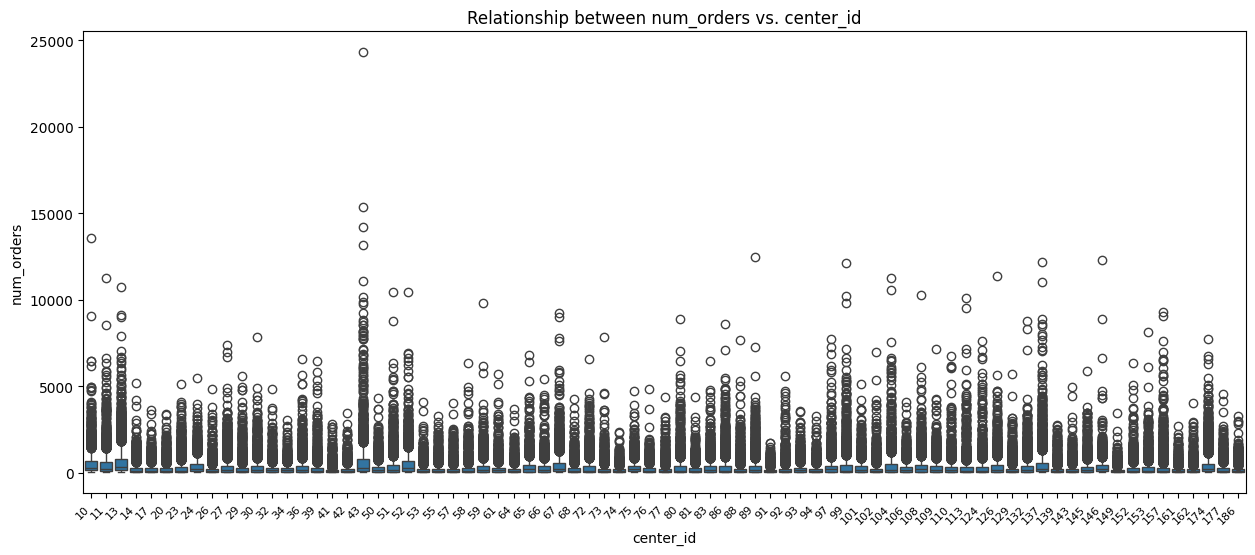

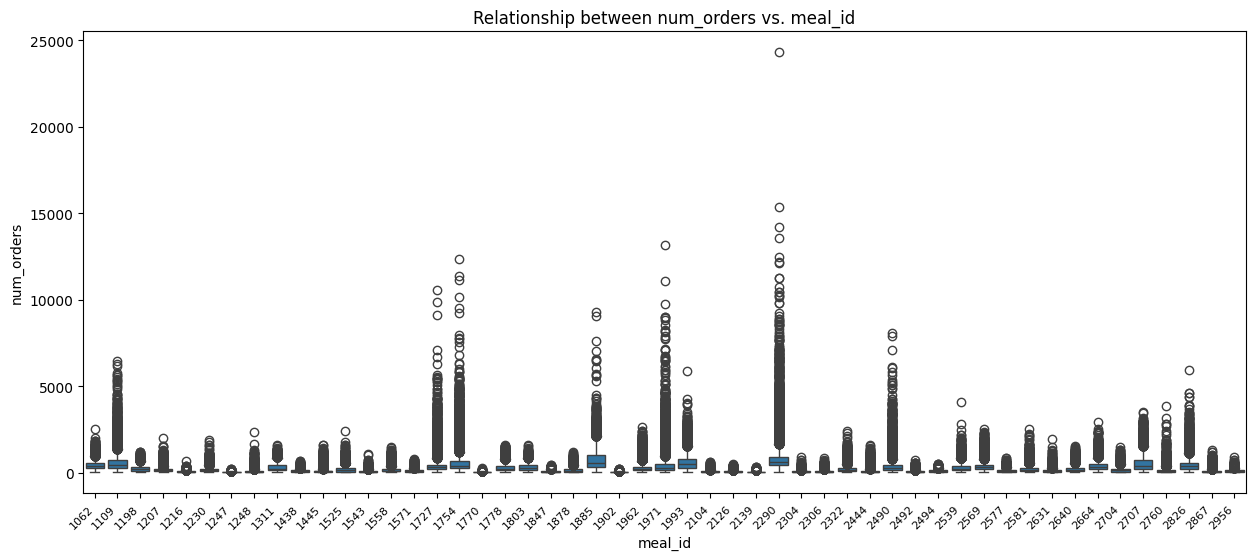

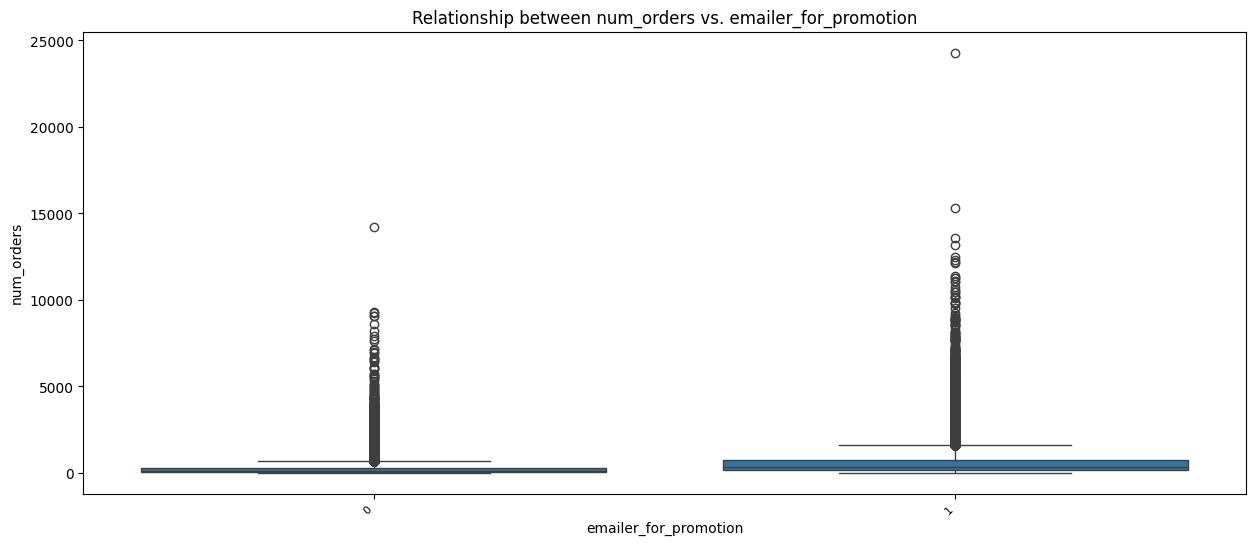

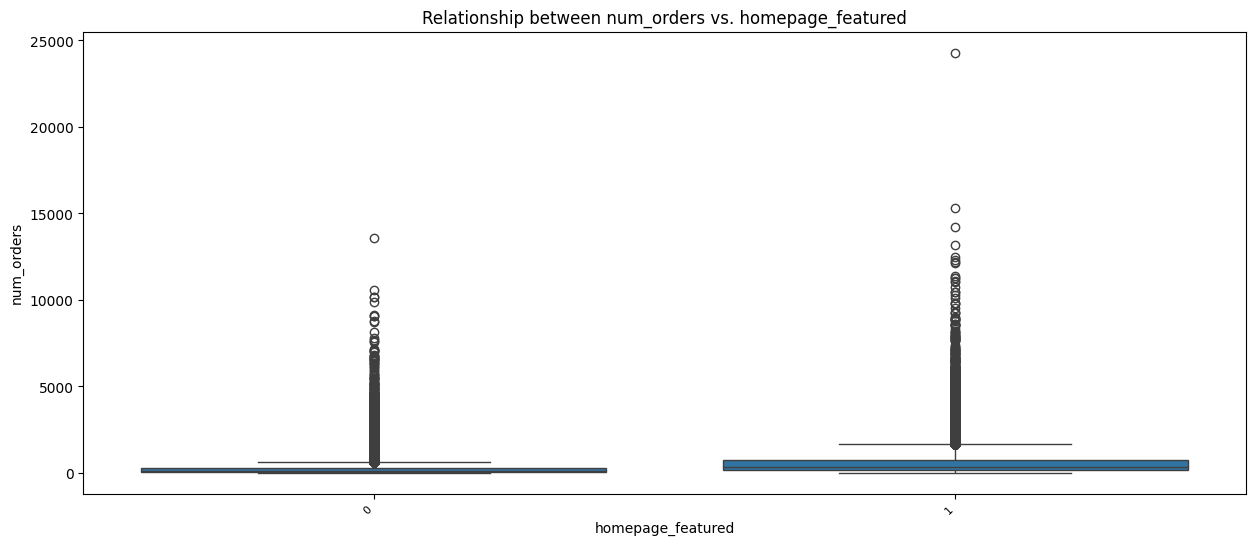

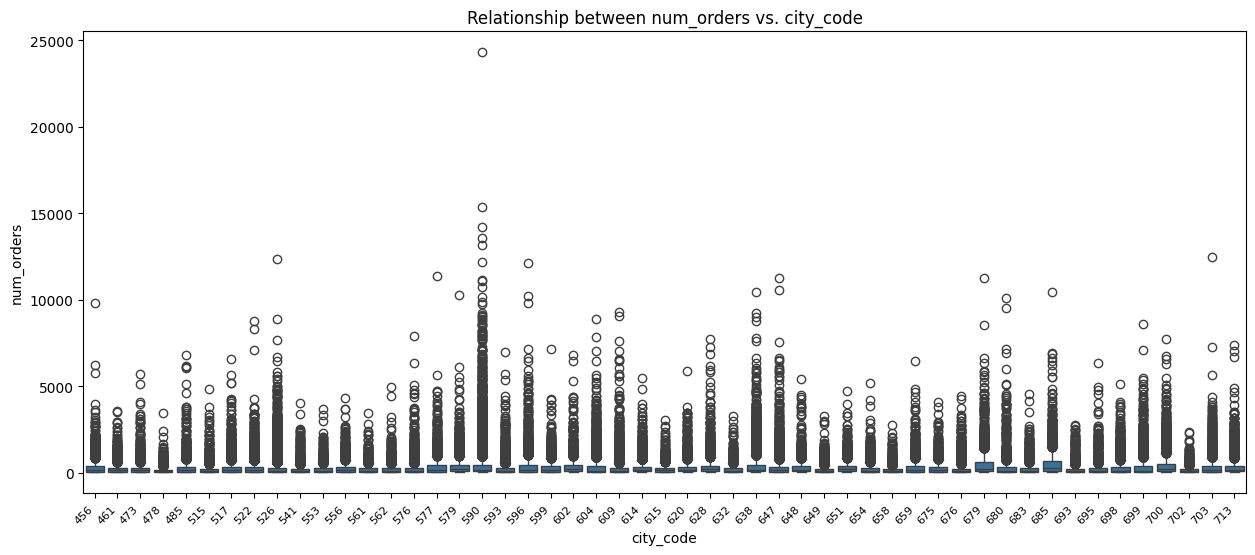

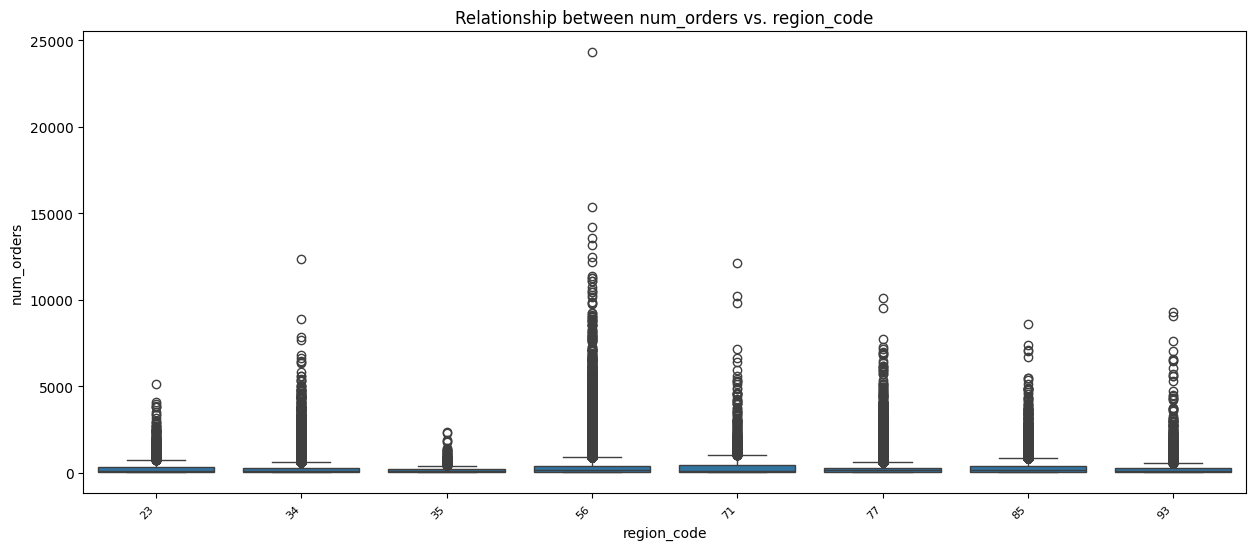

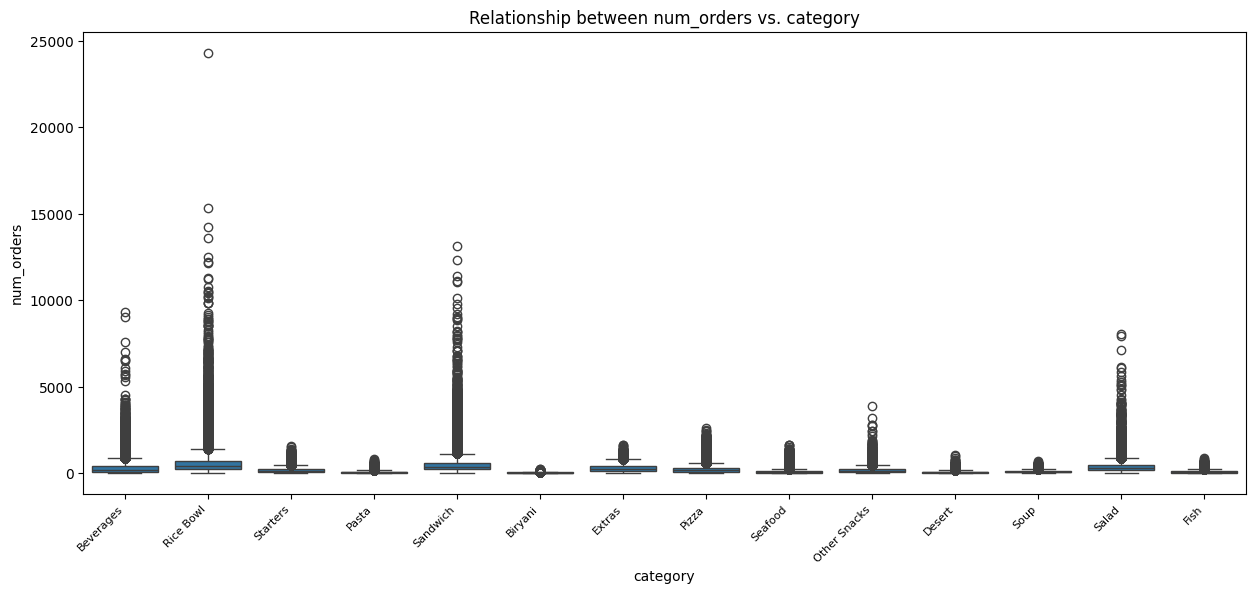

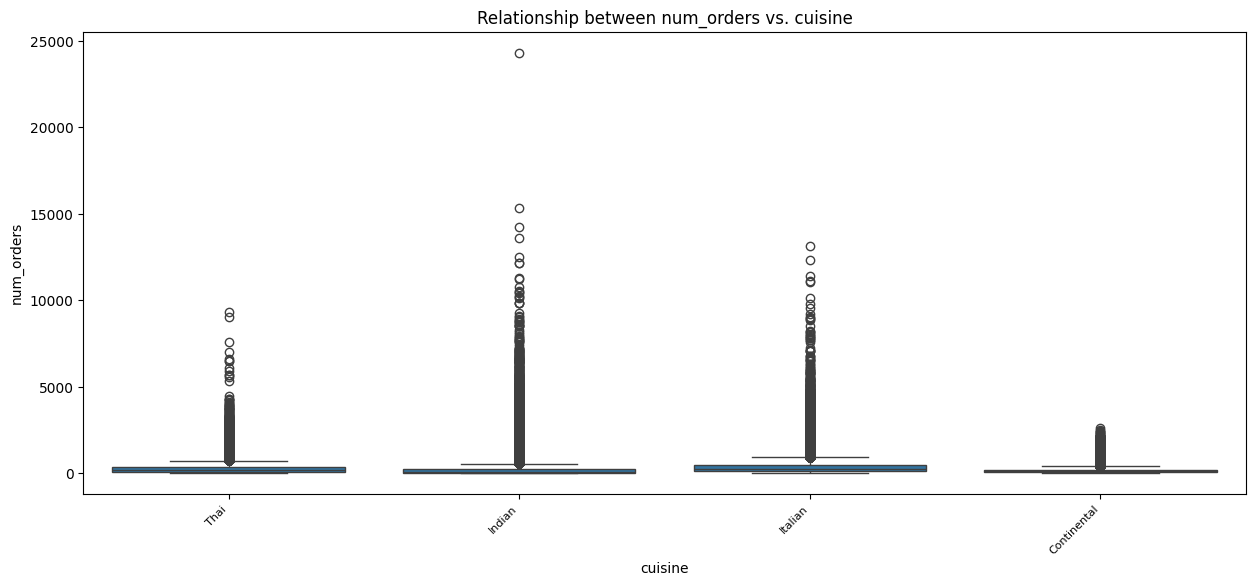

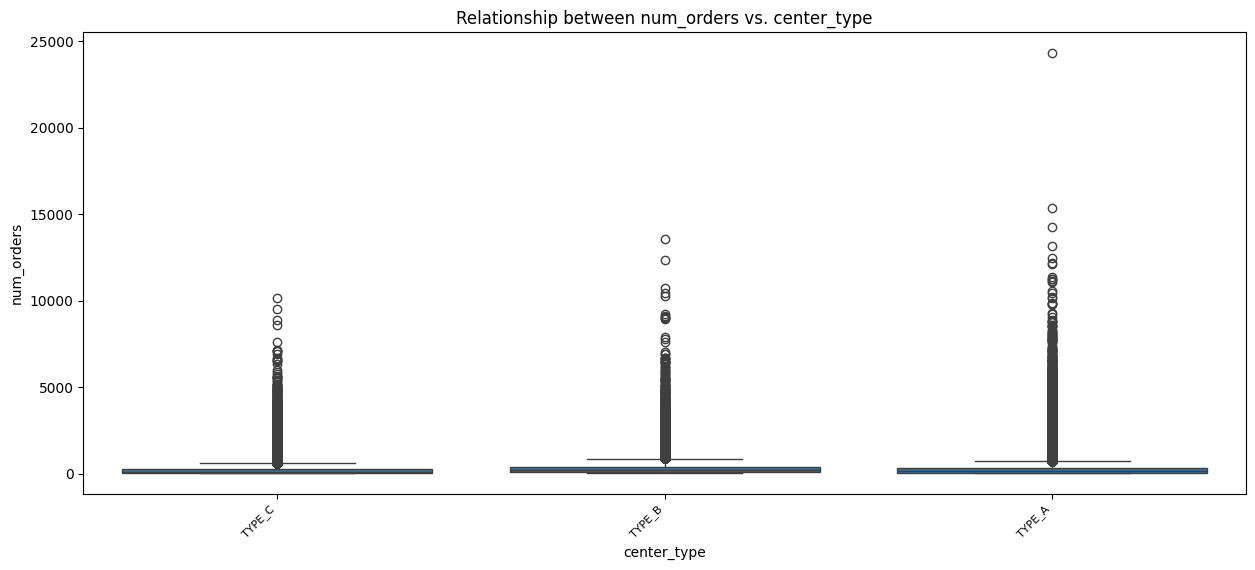

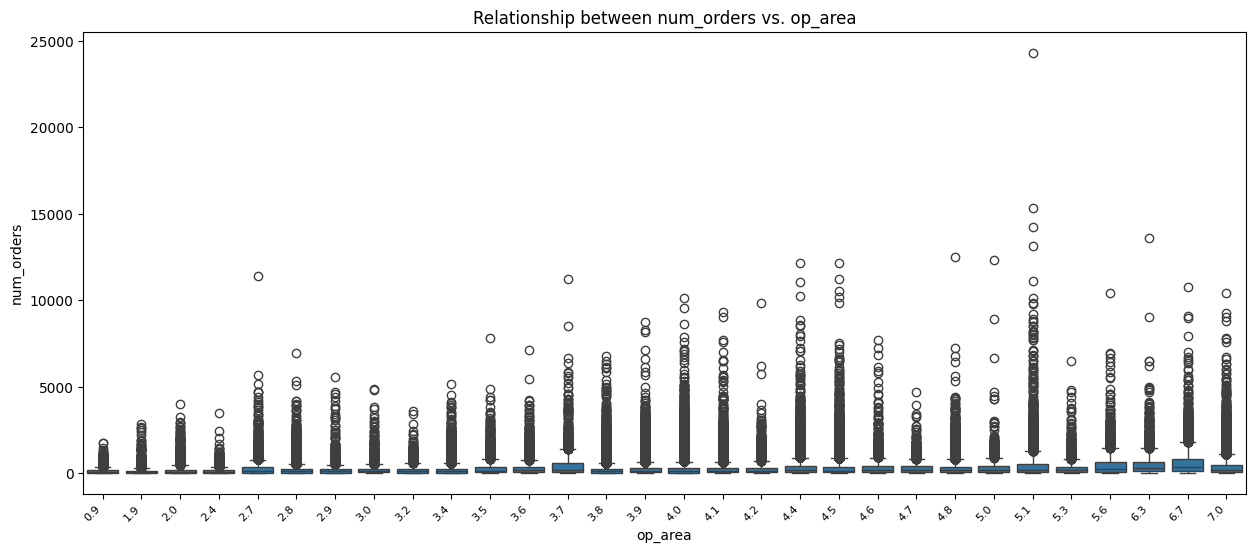

In [52]:
# Relationship between num_orders and categorical columns
for column in categorical_features:
  plt.figure(figsize=(15, 6))
  sns.boxplot(x=column, y='num_orders', data=train_df)
  plt.title(f'Relationship between num_orders vs. {column}')
  plt.xticks(rotation=45, ha='right', fontsize=8)
  plt.show()


Based on the box plots, there doesn't seem to be a clear pattern for outliers in `num_orders` feature. 